In [121]:
import numpy as np
import pandas as pd
pd.set_option("display.max_columns",None)

import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [122]:
df = pd.read_csv("churn.csv")
df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [123]:
def dataoverview(df,message):
    print(message+"\n")
    print(f'No: of Rows : {df.shape[0]}\n')
    print(f'No: of Columns : {df.shape[1]} \n')
    print("Data Features \n")
    print(df.columns.tolist())
    print(f'\nNo: of Missing Values : {df.isnull().sum().values.sum()} \n')
    print("\nUnique values:")
    print(df.nunique())
dataoverview(df,"OverView Of the Data")

OverView Of the Data

No: of Rows : 7043

No: of Columns : 21 

Data Features 

['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']

No: of Missing Values : 0 


Unique values:
customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64


**The dataset has 7043 rows and 21 columns. 
There are 17 categorical features**

In [124]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


**There are 3 Numerical features**

**Tenure:** Number of months the customer has stayed with the company

**MonthlyCharges:** The amount charged to the customer monthly

**TotalCharges:** The total amount charged to the customer

These features can also be subdivided into:

Demographic customer information:
gender , SeniorCitizen , Partner , Dependents

Services that each customer has signed up for:
PhoneService , MultipleLines , InternetService , OnlineSecurity , OnlineBackup , DeviceProtection , TechSupport , StreamingTV , StreamingMovies,

Customer account information:
tenure , Contract , PaperlessBilling , PaymentMethod , MonthlyCharges , TotalCharges

### Let’s explore the target variable.

In [125]:
target_instance = df["Churn"].value_counts().to_frame()
target_instance = target_instance.reset_index()
target_instance = target_instance.rename(columns={'index':'category'})

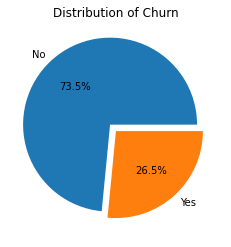

In [126]:
plt.pie(target_instance.Churn,explode=[0.1,0],labels=target_instance.category.to_list(),autopct='%.1f%%')
plt.title("Distribution of Churn")
plt.show()

We’re trying to predict users that left the company in the previous month. It’s a binary classification problem with an **imbalanced** target.

Churn: No – 73.5%
Churn: Yes – 26.5%

In [127]:
df['SeniorCitizen'] = np.where(df['SeniorCitizen']==1,'Yes','No')

# Categorical Features

In [128]:
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O' and feature not in ['TotalCharges','customerID','Churn']]
categorical_features

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod']

In [129]:
#finding the cardinality value (Finding the number of unique categories in each feature)
for feature in categorical_features:
    print(f'{feature}    number of categories  -  {len(df[feature].unique())}')

gender    number of categories  -  2
SeniorCitizen    number of categories  -  2
Partner    number of categories  -  2
Dependents    number of categories  -  2
PhoneService    number of categories  -  2
MultipleLines    number of categories  -  3
InternetService    number of categories  -  3
OnlineSecurity    number of categories  -  3
OnlineBackup    number of categories  -  3
DeviceProtection    number of categories  -  3
TechSupport    number of categories  -  3
StreamingTV    number of categories  -  3
StreamingMovies    number of categories  -  3
Contract    number of categories  -  3
PaperlessBilling    number of categories  -  2
PaymentMethod    number of categories  -  4


In [130]:
def bar(feature,df=df):
    data = df.copy() 
    data['Churn'] = np.where(data['Churn']=='Yes',1,0)
    data = data.groupby([feature, 'Churn']).size().reset_index()
    data = data.rename(columns={0:'Count'})
    data.pivot(index=feature,columns='Churn',values='Count').plot.bar(rot=0)
    plt.xlabel(feature)
    plt.ylabel('Churn')
    plt.title(feature)
    plt.show()

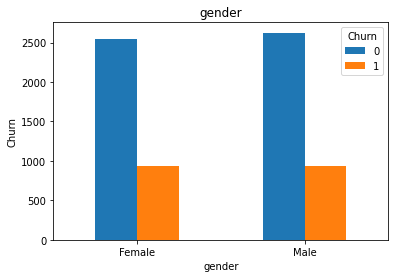

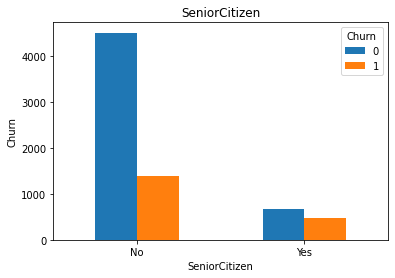

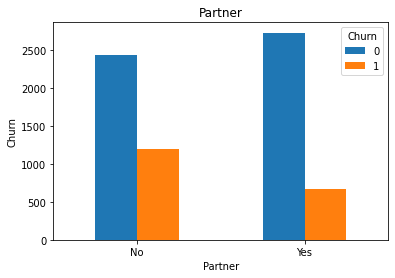

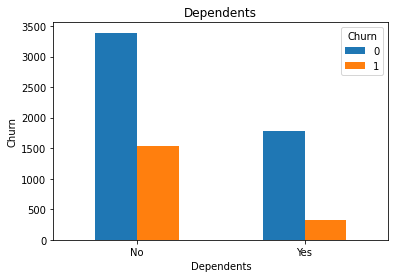

In [131]:
bar('gender')
bar('SeniorCitizen')
bar('Partner')
bar('Dependents')

**Demographic analysis insight:**
    
1. Gender and partner are evenly distributed with approximate percentage values. 

2. The difference in churn is slightly higher in females, but the small difference can be ignored. 
3. There’s a higher proportion of churn in younger customers (SeniorCitizen = No), customers with no partners, and customers with no dependents. 
4. The demographic section of data highlights on- senior citizens with no partners and no dependents as a particular segment of customers likely to churn.

## Exploring the services that each customer has signed up for.

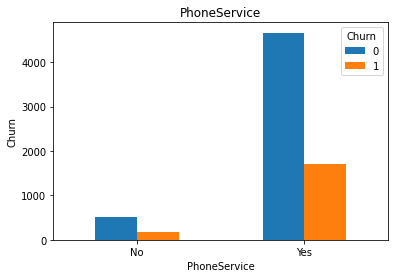

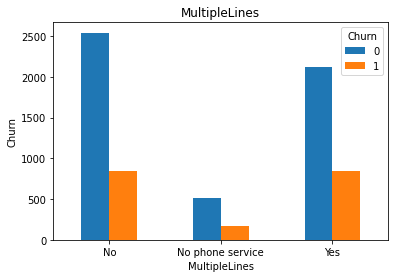

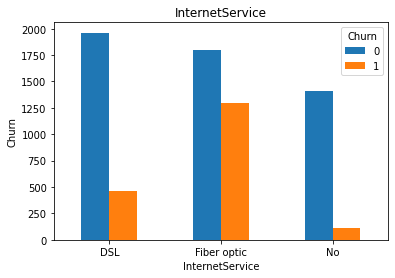

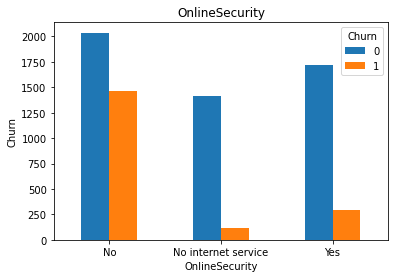

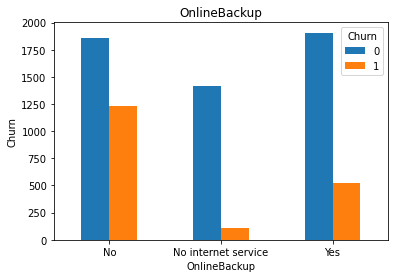

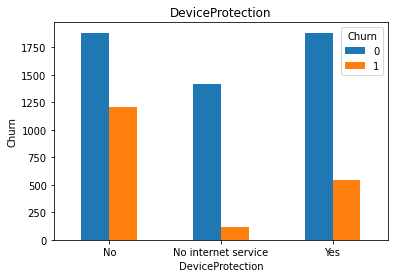

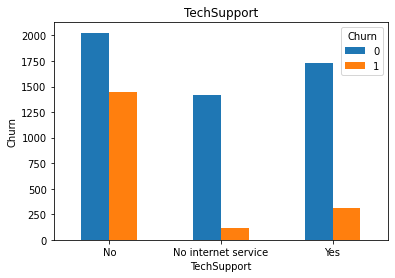

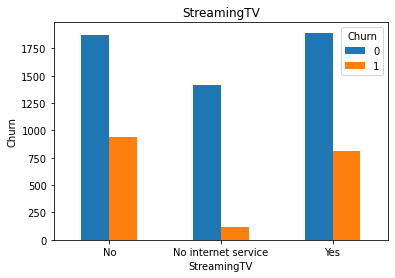

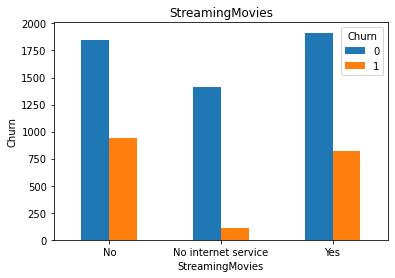

In [132]:
bar('PhoneService')
bar('MultipleLines')
bar('InternetService')
bar('OnlineSecurity')
bar('OnlineBackup')
bar('DeviceProtection')
bar('TechSupport')
bar('StreamingTV')
bar('StreamingMovies')

**Services that each customer has signed up for insight:**

**These features show significant variations across their values.**
1. If a customer doesn’t have phone service, they can’t have multiple lines. About 90% of the customers have phone services and have a higher rate to churn. 
2. Customers who have fibre optic as an internet service are more likely to churn. This can happen due to high prices, competition, customer service, and many other reasons. Fiber optic service is much more expensive than DSL, which may be one of the reasons why customers churn. 
3. Customers with  OnlineSecurity, OnlineBackup, DeviceProtection, and TechSupport are more unlikely to churn. 
4. Streaming service is not predictive for churn as it’s evenly distributed to yes and no options.

## Payment features.



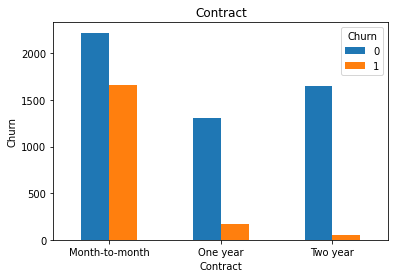

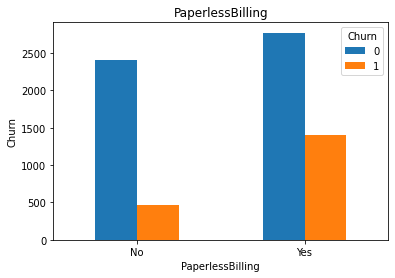

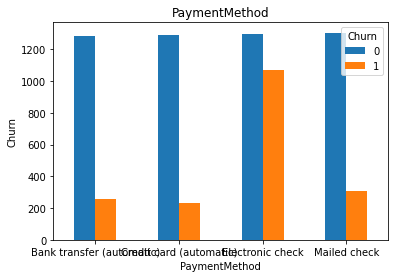

In [133]:
bar('Contract')
bar('PaperlessBilling')
bar('PaymentMethod')

**Payment insights:**

1. The shorter the contract, the higher the churn rate. Those with more extended plans face additional barriers when canceling early. This clearly explains the motivation for companies to have long-term relationships with their customers. 
2. Churn Rate is higher for the customers who opted for paperless billing. 
3. Customers who pay with electronic checks are more likely to churn, and this kind of payment is more common than other payment types.

# Numeric features.

In [134]:
df.dtypes

customerID           object
gender               object
SeniorCitizen        object
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

It can be observed that the **TotalCharges** has an ~~object~~ data type which means that it contains string components. Let’s convert it.

In [135]:
try:
    df['TotalCharges'] = df['TotalCharges'].astype(float)
except ValueError as ve:
    print(ve)

could not convert string to float: ''


This indicates that some empty values are stored as **empty spaces**. Let’s transform the feature into a numerical format while equating these empty string spaces as ***NaN*** as follows:

In [136]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'],errors='coerce')
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].median())

In [137]:
df.dtypes

customerID           object
gender               object
SeniorCitizen        object
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [138]:
numerical_features = [ feature for feature in df.columns if df[feature].dtype !='O']
numerical_features

['tenure', 'MonthlyCharges', 'TotalCharges']

### Let’s **plot the histogram** of all the numeric features to understand the distribution.


In [139]:
for feature in numerical_features:
    data = df.groupby([feature, 'Churn']).size().reset_index()
    data = data.rename(columns={0: 'Count'})
    fig = px.histogram(data, x=feature, y='Count', color='Churn', marginal='box', title=f'Churn rate frequency to {feature} distribution', color_discrete_sequence=["green", "red"])
    fig.show()

**Customer account information insight:**

1. The tenure histogram is rightly skewed and shows that most customers have been with the telecom company for just the first few months (0-9 months). 
2. The highest rate of churn is also in the first few months (0-9months). 75% of customers who end up leaving the Telco company do so within their first 30 months. 
3. The monthly charge histogram shows that clients with higher monthly charges have a higher churn rate. This suggests that discounts and promotions can be an enticing reason for customers to stay.

In [140]:
bin_df = pd.DataFrame()
for feature in numerical_features:
    bin_df[feature]= pd.qcut(df[feature],q=3,labels=['low','Medium','High'])
    
bin_df['Churn'] = df['Churn']
bin_df

,tenure,MonthlyCharges,TotalCharges,Churn
0,low,low,low,No
1,Medium,Medium,Medium,No
2,low,Medium,low,Yes
3,Medium,low,Medium,No
4,low,Medium,low,Yes
...,...,...,...,...
7038,Medium,High,Medium,No
7039,High,High,High,No
7040,low,low,low,No
7041,low,Medium,low,Yes


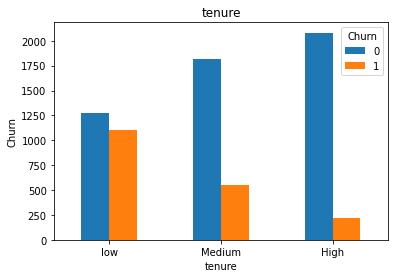

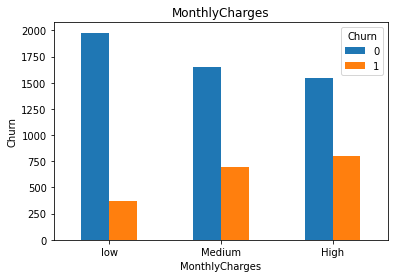

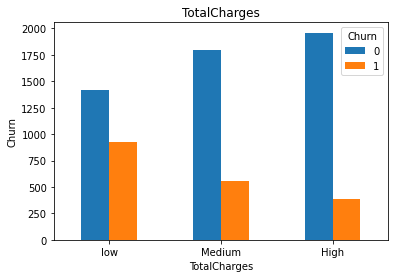

In [141]:
bar('tenure', bin_df)
bar('MonthlyCharges', bin_df)
bar('TotalCharges', bin_df)

**Based on binning,**
1. The low tenure and high monthly charge bins have higher churn rates, as supported by the previous analysis. 
2. At the same time, the low Total charge bin has a higher churn rate. 

# Data preprocessing

**The customerID column isnt useful as the feature is used for identification of customers.**

In [142]:
df.drop(["customerID"],axis=1,inplace = True)
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,No,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,No,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,No,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,No,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,Yes,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


# Encoding Categorical features

In [143]:
#Defining the map function
def binary_map(feature):
    return feature.map({'Yes':1, 'No':0})

df['Churn'] = df[['Churn']].apply(binary_map)

# Encoding gender category
df['gender'] =df['gender'].map({'Male':1, 'Female':0})

In [144]:
#Encoding other binary category
binary_list = ['SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']

In [145]:
df[binary_list] = df[binary_list].apply(binary_map)

In [146]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,1,Electronic check,29.85,29.85,0
1,1,0,0,0,34,1,No,DSL,Yes,No,Yes,No,No,No,One year,0,Mailed check,56.95,1889.50,0
2,1,0,0,0,2,1,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,1,Mailed check,53.85,108.15,1
3,1,0,0,0,45,0,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,0,0,0,0,2,1,No,Fiber optic,No,No,No,No,No,No,Month-to-month,1,Electronic check,70.70,151.65,1


In [147]:
#Encoding the other categoric features with more than two categories
df = pd.get_dummies(df, drop_first=True)

In [148]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,1,29.85,29.85,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
1,1,0,0,0,34,1,0,56.95,1889.50,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1
2,1,0,0,0,2,1,1,53.85,108.15,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
3,1,0,0,0,45,0,0,42.30,1840.75,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0
4,0,0,0,0,2,1,1,70.70,151.65,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [149]:
df.shape

(7043, 31)

<AxesSubplot:>

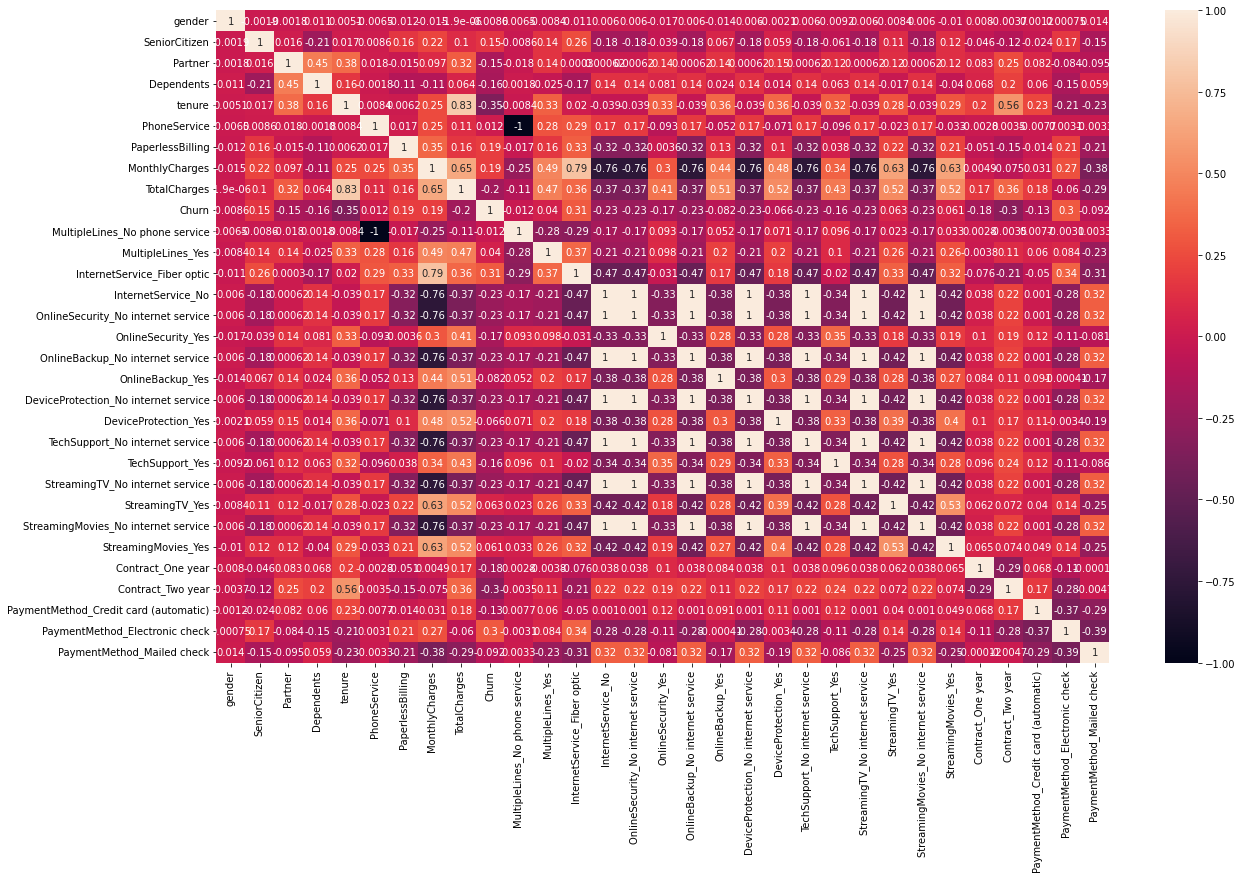

In [150]:
corr = df.corr()
plt.figure(figsize=(20,12))
sns.heatmap(corr,annot=True)

In [151]:
def correlation(dataset,thresold):
    col_corr = set()
    corr_mat = dataset.corr()
    for i in range(len(corr_mat.columns)):
        for j in range(i):
            if(abs(corr_mat.iloc[i,j])>thresold):
                colname = corr_mat.columns[i]
                col_corr.add(colname)
    return col_corr

In [152]:
cor_fetures = correlation(df,0.85)
len(cor_fetures)

7

In [153]:
cor_fetures

{'DeviceProtection_No internet service',
 'MultipleLines_No phone service',
 'OnlineBackup_No internet service',
 'OnlineSecurity_No internet service',
 'StreamingMovies_No internet service',
 'StreamingTV_No internet service',
 'TechSupport_No internet service'}

## Removing Correlated features

In [154]:
data_df = df.drop(cor_fetures,axis=1)
len(data_df.columns)

24

In [155]:
data_df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_Yes,OnlineBackup_Yes,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,1,29.85,29.85,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
1,1,0,0,0,34,1,0,56.95,1889.50,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1
2,1,0,0,0,2,1,1,53.85,108.15,1,0,0,0,1,1,0,0,0,0,0,0,0,0,1
3,1,0,0,0,45,0,0,42.30,1840.75,0,0,0,0,1,0,1,1,0,0,1,0,0,0,0
4,0,0,0,0,2,1,1,70.70,151.65,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0


## Using Linear model (GLM) to gain some statistics of the respective features with the target.

In [156]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [157]:
all_columns = [column.replace(" ","_").replace("(","_").replace(")", "_").replace("-", "_") for column in df.columns]
#Effect the change to the dataframe column names
df.columns = all_columns

In [158]:
#Prepare it for the GLM formula
glm_columns = [e for e in all_columns if e not in ['customerID', 'Churn']]
glm_columns

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'PaperlessBilling',
 'MonthlyCharges',
 'TotalCharges',
 'MultipleLines_No_phone_service',
 'MultipleLines_Yes',
 'InternetService_Fiber_optic',
 'InternetService_No',
 'OnlineSecurity_No_internet_service',
 'OnlineSecurity_Yes',
 'OnlineBackup_No_internet_service',
 'OnlineBackup_Yes',
 'DeviceProtection_No_internet_service',
 'DeviceProtection_Yes',
 'TechSupport_No_internet_service',
 'TechSupport_Yes',
 'StreamingTV_No_internet_service',
 'StreamingTV_Yes',
 'StreamingMovies_No_internet_service',
 'StreamingMovies_Yes',
 'Contract_One_year',
 'Contract_Two_year',
 'PaymentMethod_Credit_card__automatic_',
 'PaymentMethod_Electronic_check',
 'PaymentMethod_Mailed_check']

In [159]:
glm_columns = ' + '.join(map(str, glm_columns))

In [160]:
glm_columns

'gender + SeniorCitizen + Partner + Dependents + tenure + PhoneService + PaperlessBilling + MonthlyCharges + TotalCharges + MultipleLines_No_phone_service + MultipleLines_Yes + InternetService_Fiber_optic + InternetService_No + OnlineSecurity_No_internet_service + OnlineSecurity_Yes + OnlineBackup_No_internet_service + OnlineBackup_Yes + DeviceProtection_No_internet_service + DeviceProtection_Yes + TechSupport_No_internet_service + TechSupport_Yes + StreamingTV_No_internet_service + StreamingTV_Yes + StreamingMovies_No_internet_service + StreamingMovies_Yes + Contract_One_year + Contract_Two_year + PaymentMethod_Credit_card__automatic_ + PaymentMethod_Electronic_check + PaymentMethod_Mailed_check'

In [161]:
glm_model = smf.glm(formula=f'Churn ~ {glm_columns}',data=df,family=sm.families.Binomial())
res = glm_model.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  Churn   No. Observations:                 7043
Model:                            GLM   Df Residuals:                     7019
Model Family:                Binomial   Df Model:                           23
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2914.7
Date:                Fri, 02 Sep 2022   Deviance:                       5829.3
Time:                        21:49:33   Pearson chi2:                 8.04e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.2807
Covariance Type:            nonrobust                                         
                                            coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

Churn prediction is a binary classification problem, as customers either churn or are retained in a given period. Two questions need answering to guide model building:

1. Which features make customers churn or retain?
2. What are the most important features to train a model with high performance?

For the first question, you should look at the (P>|z|) column. If the absolute p-value is smaller than 0.05, it means that the feature affects Churn in a statistically significant way. Examples are:

SeniorCitizen

Tenure

Contract

PaperlessBillings etc.

In [162]:
np.exp(res.params)

Intercept                                2.287343
gender                                   0.978355
SeniorCitizen                            1.239957
Partner                                  0.997312
Dependents                               0.857471
tenure                                   0.942322
PhoneService                             1.654668
PaperlessBilling                         1.407543
MonthlyCharges                           0.960432
TotalCharges                             1.000318
MultipleLines_No_phone_service           1.382358
MultipleLines_Yes                        1.563475
InternetService_Fiber_optic              5.771657
InternetService_No                       0.774257
OnlineSecurity_No_internet_service       0.774257
OnlineSecurity_Yes                       0.814269
OnlineBackup_No_internet_service         0.774257
OnlineBackup_Yes                         1.026127
DeviceProtection_No_internet_service     0.774257
DeviceProtection_Yes                     1.159152


The second question about feature importances can be answered by looking at the exponential coefficient values. The exponential coefficient estimates the expected change in churn through a given feature by a change of one unit.

This outputs the odd ratios. Values more than 1 indicate increased churn. Values less than 1 indicate that churn is happening less.

The range of all features should be normalized so that each feature contributes approximately proportionately to the final distance, so we do feature scaling.

## Feature scaling

In [163]:
numerical_features

['tenure', 'MonthlyCharges', 'TotalCharges']

In [164]:
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler()
df['tenure'] = sc.fit_transform(df[['tenure']])
df['MonthlyCharges'] = sc.fit_transform(df[['MonthlyCharges']])
df['TotalCharges'] = sc.fit_transform(df[['TotalCharges']])

In [165]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,MultipleLines_No_phone_service,MultipleLines_Yes,InternetService_Fiber_optic,InternetService_No,OnlineSecurity_No_internet_service,OnlineSecurity_Yes,OnlineBackup_No_internet_service,OnlineBackup_Yes,DeviceProtection_No_internet_service,DeviceProtection_Yes,TechSupport_No_internet_service,TechSupport_Yes,StreamingTV_No_internet_service,StreamingTV_Yes,StreamingMovies_No_internet_service,StreamingMovies_Yes,Contract_One_year,Contract_Two_year,PaymentMethod_Credit_card__automatic_,PaymentMethod_Electronic_check,PaymentMethod_Mailed_check
0,0,0,1,0,0.013889,0,1,0.115423,0.001275,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
1,1,0,0,0,0.472222,1,0,0.385075,0.215867,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1
2,1,0,0,0,0.027778,1,1,0.354229,0.010310,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
3,1,0,0,0,0.625000,0,0,0.239303,0.210241,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0.027778,1,1,0.521891,0.015330,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


## Model Training 

In [166]:
# Import Machine learning algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

In [167]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,roc_auc_score

In [168]:
#Split data into train and test sets
from sklearn.model_selection import train_test_split

X = df.drop('Churn',axis=1)
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=50)

In [169]:
#Defining the modelling function
def modeling(alg, alg_name, params={}):
    model = alg(**params) #Instantiating the algorithm class and unpacking parameters if any
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    #Performance evaluation
    def print_scores(alg, y_true, y_pred):
        print(alg_name)
        acc_score = accuracy_score(y_true, y_pred)
        print("accuracy: ",acc_score)
        pre_score = precision_score(y_true, y_pred)
        print("precision: ",pre_score)
        rec_score = recall_score(y_true, y_pred)                            
        print("recall: ",rec_score)
        f_score = f1_score(y_true, y_pred, average='weighted')
        print("f1_score: ",f_score)

    print_scores(alg, y_test, y_pred)
    return model

# Running logistic regression model
log_model = modeling(LogisticRegression, 'Logistic Regression')

Logistic Regression
accuracy:  0.7983909133932797
precision:  0.6281800391389433
recall:  0.5763016157989228
f1_score:  0.7955174819104321


## feature selection

In [170]:
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold

log = LogisticRegression()
rfecv = RFECV(estimator=log,cv=StratifiedKFold(10,random_state=50,shuffle=True),scoring='accuracy')
rfecv.fit(X, y)

RFECV(cv=StratifiedKFold(n_splits=10, random_state=50, shuffle=True),
      estimator=LogisticRegression(), scoring='accuracy')

/home/chethancheths/.local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:103: FutureWarning:

The `grid_scores_` attribute is deprecated in version 1.0 in favor of `cv_results_` and will be removed in version 1.2.



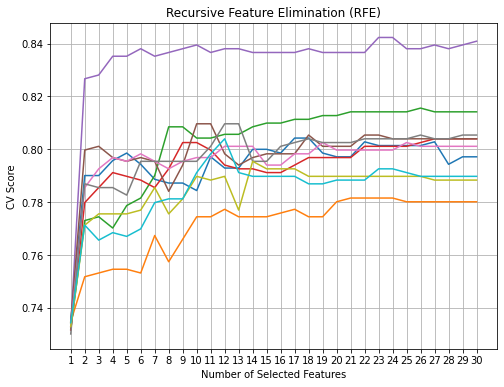

The optimal number of features: 23


In [171]:
plt.figure(figsize=(8,6))
plt.plot(range(1,len(rfecv.grid_scores_)+1),rfecv.grid_scores_)
plt.grid()
plt.xticks(range(1, X.shape[1]+1))
plt.xlabel("Number of Selected Features")
plt.ylabel("CV Score")
plt.title("Recursive Feature Elimination (RFE)")
plt.show()

print("The optimal number of features: {}".format(rfecv.n_features_))

### Saving dataframe with optimal features

In [172]:
X_rfe = X.iloc[:,rfecv.support_]

In [184]:
#Overview of the optimal features in comparison with the intial dataframe
print("\"X\" dimension: {}".format(X.shape))
print('-'*30)
print("\"X\" column list:", X.columns.tolist())
print('-'*30)
print("\"X_rfe\" dimension: {}".format(X_rfe.shape))
print('-'*30)
print("\"X_rfe\" column list:", X_rfe.columns.tolist())

"X" dimension: (7043, 30)
------------------------------
"X" column list: ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'MultipleLines_No_phone_service', 'MultipleLines_Yes', 'InternetService_Fiber_optic', 'InternetService_No', 'OnlineSecurity_No_internet_service', 'OnlineSecurity_Yes', 'OnlineBackup_No_internet_service', 'OnlineBackup_Yes', 'DeviceProtection_No_internet_service', 'DeviceProtection_Yes', 'TechSupport_No_internet_service', 'TechSupport_Yes', 'StreamingTV_No_internet_service', 'StreamingTV_Yes', 'StreamingMovies_No_internet_service', 'StreamingMovies_Yes', 'Contract_One_year', 'Contract_Two_year', 'PaymentMethod_Credit_card__automatic_', 'PaymentMethod_Electronic_check', 'PaymentMethod_Mailed_check']
------------------------------
"X_rfe" dimension: (7043, 23)
------------------------------
"X_rfe" column list: ['SeniorCitizen', 'Dependents', 'tenure', 'PhoneService', 'PaperlessBilling

In [185]:
#Splitting data with optimal features

X_train, X_test, y_train, y_test = train_test_split(X_rfe, y, test_size=0.3, random_state=50)  

log_model = modeling(LogisticRegression,'Logistic Regression Classification')

Logistic Regression Classification
accuracy:  0.8017037387600567
precision:  0.6374501992031872
recall:  0.5745062836624776
f1_score:  0.7982762676502377


### Trying other machine learning algorithms:

In [186]:
svc_model = modeling(SVC, 'SVC Classification')

SVC Classification
accuracy:  0.7993374349266446
precision:  0.6494382022471911
recall:  0.518850987432675
f1_score:  0.7916082146150322


In [187]:
rf_model = modeling(RandomForestClassifier, "Random Forest Classification")

Random Forest Classification
accuracy:  0.7823000473260767
precision:  0.6021052631578947
recall:  0.5134649910233393
f1_score:  0.7764456354670792


In [188]:
#Decision tree
dt_model = modeling(DecisionTreeClassifier, "Decision Tree Classification")

Decision Tree Classification
accuracy:  0.722669190724089
precision:  0.4759535655058043
recall:  0.5152603231597845
f1_score:  0.7260875579151493


In [189]:
#Naive bayes 
nb_model = modeling(GaussianNB, "Naive Bayes Classification")

Naive Bayes Classification
accuracy:  0.6540463795551349
precision:  0.4257679180887372
recall:  0.895870736086176
f1_score:  0.6729702812977834


From the selected performance metrics, the **Logistic Regression algorithm** has the ***highest scores*** across all chosen metrics. It can be improved with various techniques, but we’ll quickly improve it with **hyperparameter tuning (Random search).**

In [190]:
log_model = modeling(LogisticRegression, 'Logistic Regression Classification')

Logistic Regression Classification
accuracy:  0.8017037387600567
precision:  0.6374501992031872
recall:  0.5745062836624776
f1_score:  0.7982762676502377


## Model Fitting using Artificial Neural network

In [191]:
len(X_train.columns)

23

In [192]:
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import confusion_matrix,classification_report

In [194]:
def ANN(X_train,X_test,y_train,y_test,loss,weight):
    model = keras.Sequential([
    keras.layers.Dense(17,input_shape=(23,),activation='relu'),
    keras.layers.Dense(1,activation='sigmoid'),
    ])

    model.compile(optimizer='adam',loss=loss ,metrics=['accuracy'])

    if weight==-1:
        model.fit(X_train,y_train,epochs=30)
    else:
        model.fit(X_train,y_train,epochs=30,class_weight=weight)
        
    print(model.evaluate(X_test,y_test))
    
    y_preds = model.predict(X_test)
    y_preds = np.round(y_preds)
    
    print("Classification report \n",classification_report(y_test,y_preds))
    
    return y_preds

In [195]:
y_preds = ANN(X_train,X_test,y_train,y_test,'binary_crossentropy',-1)

Epoch 1/30
155/155 [==============================] - 2s 5ms/step - loss: 0.5719 - accuracy: 0.6903
Epoch 2/30
155/155 [==============================] - 1s 5ms/step - loss: 0.4535 - accuracy: 0.7822
Epoch 3/30
155/155 [==============================] - 1s 5ms/step - loss: 0.4357 - accuracy: 0.7913
Epoch 4/30
155/155 [==============================] - 1s 5ms/step - loss: 0.4283 - accuracy: 0.7953
Epoch 5/30
155/155 [==============================] - 1s 5ms/step - loss: 0.4244 - accuracy: 0.8028
Epoch 6/30
155/155 [==============================] - 1s 5ms/step - loss: 0.4212 - accuracy: 0.8016
Epoch 7/30
155/155 [==============================] - 1s 5ms/step - loss: 0.4199 - accuracy: 0.8006
Epoch 8/30
155/155 [==============================] - 1s 5ms/step - loss: 0.4182 - accuracy: 0.8047
Epoch 9/30
155/155 [==============================] - 1s 5ms/step - loss: 0.4163 - accuracy: 0.8028
Epoch 10/30
155/155 [==============================] - 1s 5ms/step - loss: 0.4164 - accuracy: 0.8032

**The f1-score for 1 is greater than 0 Which is due to imbalance in the dataset**

## HandLing Imbalanced DataSet

In [68]:
y_test.value_counts()

0    1556
1     557
Name: Churn, dtype: int64

### Method 1 : Random UnderSampling 

In [85]:
class_0_count , class_1_count = df['Churn'].value_counts()


df_class_0 = df[df['Churn']==0]
df_class_1 = df[df['Churn']==1]

In [86]:
class_0_count , class_1_count

(5174, 1869)

In [87]:
df_class_0.shape

(5174, 31)

In [88]:
df_class_1.shape

(1869, 31)

In [92]:
df_class0_under = df_class_0.sample(class_1_count)

df_under = pd.concat([df_class0_under,df_class_1],axis=0)

In [93]:
df_under.shape

(3738, 31)

In [94]:
df_under.Churn.value_counts()

0    1869
1    1869
Name: Churn, dtype: int64

In [197]:
selected_features = ['SeniorCitizen', 'Dependents', 'tenure', 'PhoneService', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'MultipleLines_No_phone_service', 'MultipleLines_Yes', 'InternetService_Fiber_optic', 'InternetService_No', 'OnlineSecurity_No_internet_service', 'OnlineSecurity_Yes', 'OnlineBackup_No_internet_service', 'TechSupport_No_internet_service', 'TechSupport_Yes', 'StreamingTV_No_internet_service', 'StreamingTV_Yes', 'StreamingMovies_No_internet_service', 'StreamingMovies_Yes', 'Contract_One_year', 'Contract_Two_year', 'PaymentMethod_Electronic_check']

In [198]:
X = df_under[selected_features]
y = df_under['Churn']

In [199]:
X.shape

(3738, 23)

In [200]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=50,stratify=y)

In [201]:
y_preds = ANN(X_train,X_test,y_train,y_test,'binary_crossentropy',-1)

Epoch 1/30
88/88 [==============================] - 1s 5ms/step - loss: 0.6647 - accuracy: 0.5919
Epoch 2/30
88/88 [==============================] - 0s 5ms/step - loss: 0.5668 - accuracy: 0.7364
Epoch 3/30
88/88 [==============================] - 0s 5ms/step - loss: 0.5293 - accuracy: 0.7460
Epoch 4/30
88/88 [==============================] - 0s 5ms/step - loss: 0.5128 - accuracy: 0.7510
Epoch 5/30
88/88 [==============================] - 0s 5ms/step - loss: 0.5052 - accuracy: 0.7560
Epoch 6/30
88/88 [==============================] - 0s 5ms/step - loss: 0.5003 - accuracy: 0.7620
Epoch 7/30
88/88 [==============================] - 0s 5ms/step - loss: 0.4980 - accuracy: 0.7617
Epoch 8/30
88/88 [==============================] - 0s 5ms/step - loss: 0.4966 - accuracy: 0.7642
Epoch 9/30
88/88 [==============================] - 0s 5ms/step - loss: 0.4949 - accuracy: 0.7613
Epoch 10/30
88/88 [==============================] - 0s 5ms/step - loss: 0.4934 - accuracy: 0.7631
Epoch 11/30
88/88 [

## Method 2 - oversampling

In [203]:
class_0_count , class_1_count

(5174, 1869)

In [205]:
df_class_1_over = df_class_1.sample(class_0_count,replace=True)
df_class_1_over.shape

(5174, 31)

In [208]:
df_over = pd.concat([df_class_0,df_class_1_over],axis=0)

In [209]:
df_over.shape

(10348, 31)

In [210]:
df_over.Churn.value_counts()

0    5174
1    5174
Name: Churn, dtype: int64

In [211]:
X = df_over[selected_features]
y = df_over['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=50,stratify=y)

In [213]:
y_preds = ANN(X_train,X_test,y_train,y_test,'binary_crossentropy',-1)

Epoch 1/30
88/88 [==============================] - 4s 7ms/step - loss: 0.6468 - accuracy: 0.6275
Epoch 2/30
88/88 [==============================] - 1s 7ms/step - loss: 0.5630 - accuracy: 0.7235
Epoch 3/30
88/88 [==============================] - 1s 7ms/step - loss: 0.5285 - accuracy: 0.7453
Epoch 4/30
88/88 [==============================] - 1s 7ms/step - loss: 0.5155 - accuracy: 0.7481
Epoch 5/30
88/88 [==============================] - 1s 7ms/step - loss: 0.5096 - accuracy: 0.7549
Epoch 6/30
88/88 [==============================] - 1s 7ms/step - loss: 0.5049 - accuracy: 0.7538
Epoch 7/30
88/88 [==============================] - 1s 6ms/step - loss: 0.5047 - accuracy: 0.7585
Epoch 8/30
88/88 [==============================] - 1s 7ms/step - loss: 0.5018 - accuracy: 0.7617
Epoch 9/30
88/88 [==============================] - 1s 7ms/step - loss: 0.5009 - accuracy: 0.7578
Epoch 10/30
88/88 [==============================] - 1s 7ms/step - loss: 0.5000 - accuracy: 0.7663
Epoch 11/30
88/88 [

### Method 3 : SMOTE

over sampling by producing synthetic samples using KNN or any other alogrithm

In [215]:
X = df.drop('Churn',axis=1)
y = df['Churn']

In [217]:
y.value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

In [225]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')
X_sm,y_sm = smote.fit_resample(X,y)

y_sm.value_counts()

0    5174
1    5174
Name: Churn, dtype: int64

In [231]:
X_sm = X_sm[selected_features]

X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.25, random_state=15,stratify=y_sm)

In [232]:
X_train.shape

(7761, 23)

In [233]:
y_train.value_counts()

1    3881
0    3880
Name: Churn, dtype: int64

In [234]:
y_test.value_counts()

0    1294
1    1293
Name: Churn, dtype: int64

In [235]:
y_preds = ANN(X_train,X_test,y_train,y_test,'binary_crossentropy',-1)

Epoch 1/30
243/243 [==============================] - 4s 8ms/step - loss: 0.5560 - accuracy: 0.7196
Epoch 2/30
243/243 [==============================] - 2s 8ms/step - loss: 0.4814 - accuracy: 0.7725
Epoch 3/30
243/243 [==============================] - 2s 8ms/step - loss: 0.4706 - accuracy: 0.7794
Epoch 4/30
243/243 [==============================] - 2s 8ms/step - loss: 0.4656 - accuracy: 0.7808
Epoch 5/30
243/243 [==============================] - 2s 9ms/step - loss: 0.4622 - accuracy: 0.7817
Epoch 6/30
243/243 [==============================] - 2s 8ms/step - loss: 0.4597 - accuracy: 0.7828
Epoch 7/30
243/243 [==============================] - 2s 8ms/step - loss: 0.4579 - accuracy: 0.7834
Epoch 8/30
243/243 [==============================] - 2s 8ms/step - loss: 0.4564 - accuracy: 0.7828
Epoch 9/30
243/243 [==============================] - 2s 8ms/step - loss: 0.4551 - accuracy: 0.7852
Epoch 10/30
243/243 [==============================] - 2s 8ms/step - loss: 0.4535 - accuracy: 0.7848

### Method 4 : Use of Ensemble with undersampling

Create Batches and training each batch with undersampled data and taking avg

In [240]:
X = df[selected_features]
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15,stratify=y)

In [241]:
y_train.value_counts()

0    4139
1    1495
Name: Churn, dtype: int64

In [242]:
4139/3

1379.6666666666667

In [245]:
df3= X_train.copy()
df3['Churn'] = y_train

In [246]:
df3_class0 = df3[df3.Churn==0]
df3_class1 = df3[df3.Churn==1]

In [247]:
df3_class0.shape

(4139, 24)

In [252]:
def get_train_batch(df_maj,df_min,start,end):
    df_train = pd.concat([df_maj[start:end],df_min],axis=0)
    
    X_train = df_train.drop('Churn',axis=1)
    y_train = df_train.Churn
    
    return X_train,y_train

In [261]:
X_train.shape

(2990, 23)

In [262]:
X_train,y_train = get_train_batch(df3_class0,df3_class1,0,1495)
y_pred1 = ANN(X_train,X_test,y_train,y_test,'binary_crossentropy',-1)

Epoch 1/30
94/94 [==============================] - 2s 5ms/step - loss: 0.5699 - accuracy: 0.7321
Epoch 2/30
94/94 [==============================] - 0s 5ms/step - loss: 0.5110 - accuracy: 0.7622
Epoch 3/30
94/94 [==============================] - 0s 5ms/step - loss: 0.4880 - accuracy: 0.7666
Epoch 4/30
94/94 [==============================] - 0s 5ms/step - loss: 0.4817 - accuracy: 0.7679
Epoch 5/30
94/94 [==============================] - 0s 5ms/step - loss: 0.4782 - accuracy: 0.7662
Epoch 6/30
94/94 [==============================] - 1s 6ms/step - loss: 0.4756 - accuracy: 0.7679
Epoch 7/30
94/94 [==============================] - 0s 5ms/step - loss: 0.4740 - accuracy: 0.7686
Epoch 8/30
94/94 [==============================] - 0s 5ms/step - loss: 0.4720 - accuracy: 0.7696
Epoch 9/30
94/94 [==============================] - 0s 5ms/step - loss: 0.4721 - accuracy: 0.7696
Epoch 10/30
94/94 [==============================] - 0s 5ms/step - loss: 0.4699 - accuracy: 0.7709
Epoch 11/30
94/94 [

In [263]:
X_train,y_train = get_train_batch(df3_class0,df3_class1,1495,2990)
y_pred2 = ANN(X_train,X_test,y_train,y_test,'binary_crossentropy',-1)

Epoch 1/30
94/94 [==============================] - 1s 4ms/step - loss: 0.6514 - accuracy: 0.5993
Epoch 2/30
94/94 [==============================] - 0s 4ms/step - loss: 0.5511 - accuracy: 0.7144
Epoch 3/30
94/94 [==============================] - 0s 5ms/step - loss: 0.5131 - accuracy: 0.7455
Epoch 4/30
94/94 [==============================] - 0s 4ms/step - loss: 0.4989 - accuracy: 0.7548
Epoch 5/30
94/94 [==============================] - 0s 4ms/step - loss: 0.4921 - accuracy: 0.7572
Epoch 6/30
94/94 [==============================] - 0s 4ms/step - loss: 0.4880 - accuracy: 0.7595
Epoch 7/30
94/94 [==============================] - 0s 4ms/step - loss: 0.4858 - accuracy: 0.7605
Epoch 8/30
94/94 [==============================] - 0s 4ms/step - loss: 0.4836 - accuracy: 0.7656
Epoch 9/30
94/94 [==============================] - 0s 4ms/step - loss: 0.4824 - accuracy: 0.7659
Epoch 10/30
94/94 [==============================] - 0s 4ms/step - loss: 0.4816 - accuracy: 0.7682
Epoch 11/30
94/94 [

In [264]:
X_train,y_train = get_train_batch(df3_class0,df3_class1,2990,4130)
y_pred3 = ANN(X_train,X_test,y_train,y_test,'binary_crossentropy',-1)

Epoch 1/30
83/83 [==============================] - 3s 4ms/step - loss: 0.6789 - accuracy: 0.5598
Epoch 2/30
83/83 [==============================] - 0s 5ms/step - loss: 0.5661 - accuracy: 0.7450
Epoch 3/30
83/83 [==============================] - 0s 5ms/step - loss: 0.5140 - accuracy: 0.7579
Epoch 4/30
83/83 [==============================] - 0s 5ms/step - loss: 0.4938 - accuracy: 0.7628
Epoch 5/30
83/83 [==============================] - 0s 5ms/step - loss: 0.4855 - accuracy: 0.7677
Epoch 6/30
83/83 [==============================] - 0s 5ms/step - loss: 0.4819 - accuracy: 0.7658
Epoch 7/30
83/83 [==============================] - 0s 5ms/step - loss: 0.4802 - accuracy: 0.7677
Epoch 8/30
83/83 [==============================] - 0s 4ms/step - loss: 0.4769 - accuracy: 0.7715
Epoch 9/30
83/83 [==============================] - 0s 5ms/step - loss: 0.4758 - accuracy: 0.7715
Epoch 10/30
83/83 [==============================] - 0s 5ms/step - loss: 0.4748 - accuracy: 0.7742
Epoch 11/30
83/83 [

In [267]:
len(y_pred3)

1409

In [272]:
y_pred_final = y_pred1.copy()

for i in range(len(y_pred1)):
    n_ones = y_pred1[i] + y_pred2[i] + y_pred3[i]
    if n_ones > 1 :
        y_pred_final[i] = 1
    else:
        y_pred_final[i] = 0

In [273]:
print(classification_report(y_test,y_pred_final))

              precision    recall  f1-score   support

           0       0.90      0.71      0.79      1035
           1       0.49      0.77      0.60       374

    accuracy                           0.73      1409
   macro avg       0.69      0.74      0.70      1409
weighted avg       0.79      0.73      0.74      1409

